# [Data Train] Competição ML #1 - Titanic
## CRISP-DM: Evaluation
**Autor:** Wanderson Marques - wdsmarques@gmail.com

Nesse notebook é realizada a **avaliação** do modelo preditivo, onde os dados de validação são utilizados para verificar a capacidade preditiva. Essa é a quinta fase da metodologia CRISP-DM, o evaluation. 

<img src="imgs/evaluation.jpg" />

### Carregar bibliotecas

In [30]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [31]:
# Exibir gráficos dentro do Jupyter Notebook
%matplotlib inline

# Definir tamanho padrão para os gráficos
rcParams['figure.figsize'] = 8, 4

### Carregar dataset de validação

In [32]:
dataset = pd.read_csv('datasets/teste_split.csv')
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,female,24.0,1,0,15.8500,S
1,0,3,male,NaN,0,0,7.8958,C
2,0,1,male,44.0,2,0,90.0000,Q
3,1,1,male,48.0,1,0,76.7292,C
4,0,3,male,NaN,0,0,7.8958,C


### Carregar modelo preditivo

Nesse momento o modelo preditivo já foi treinado, com os dados de treino.

In [33]:
model = joblib.load('models/model.pkl')

### Preparar os dados de validação

Para imputação em valores nulos foram utilizados os valores padrão do conjunto de treino. Age = 29.97 e Embarked = S

In [34]:
# Imputar valores nulos usando padrões do conjunto de treino
dataset.loc[dataset['Age'].isnull(), 'Age'] = 29.97
dataset.loc[dataset['Embarked'].isnull(), 'Embarked'] = 'S'

# Transformar variáveis categóricas
dataset = pd.get_dummies(dataset)
dataset.drop(['Embarked_S', 'Sex_male'], inplace=True, axis=1)

In [35]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
0,1,3,24.00,1,0,15.8500,1,0,0
1,0,3,29.97,0,0,7.8958,0,1,0
2,0,1,44.00,2,0,90.0000,0,0,1
3,1,1,48.00,1,0,76.7292,0,1,0
4,0,3,29.97,0,0,7.8958,0,1,0


### Separar atributos e classe 

In [36]:
X = dataset.drop(['Survived'], axis=1)
y = dataset['Survived']

### Realizar predição para conjunto de validação

In [37]:
y_pred = model.predict(X)
y_proba = model.predict_proba(X)

### Gerar matriz de confusão

Text(0.5, 15.0, 'Predicted label')

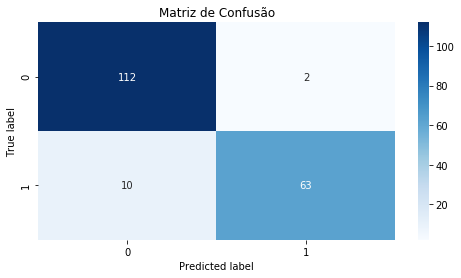

In [38]:
cm = confusion_matrix(y, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusão')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Calcular métricas de classificação

In [39]:
accuracy_score(y, y_pred)

0.9358288770053476

In [40]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       114
           1       0.97      0.86      0.91        73

    accuracy                           0.94       187
   macro avg       0.94      0.92      0.93       187
weighted avg       0.94      0.94      0.94       187



### Gerar curva ROC

In [41]:
fp, tp, thresholds = roc_curve(y, y_proba[:, 1])

Text(0.5, 1.0, 'Curva ROC')

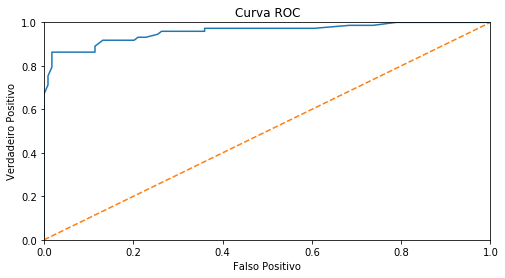

In [42]:
plt.plot(fp, tp)

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')

In [43]:
# Área sob a curva ROC
auc(fp, tp)

0.9573419850997356